In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
attributes=['P_under','ANR','P_TS','P_NRL','Tax_rate','NOC']
path=r'./house_to_module2.csv'
df=pd.read_csv(path)
df.drop(['Unnamed: 0'],inplace=True,axis=1)
print('Done')
x_data=df[attributes]
y_data=df['Price']

Done


In [4]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 76
number of training samples: 430


In [5]:
attributes=['P_under','ANR','P_TS','P_NRL','Tax_rate','NOC']

In [6]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[attributes])
x_test_pr=pr.fit_transform(x_test[attributes])

In [7]:
RigeModel=Ridge(alpha=10000)

In [8]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
yhat = RigeModel.predict(x_test_pr)

In [10]:
yhat.shape

(76,)

In [11]:
score=RigeModel.score(x_test_pr,y_test)
mse=mean_squared_error(y_test,yhat)
print('score: ',score,'MSE: ',mse)

score:  0.8166547327333753 MSE:  16.920087505998126


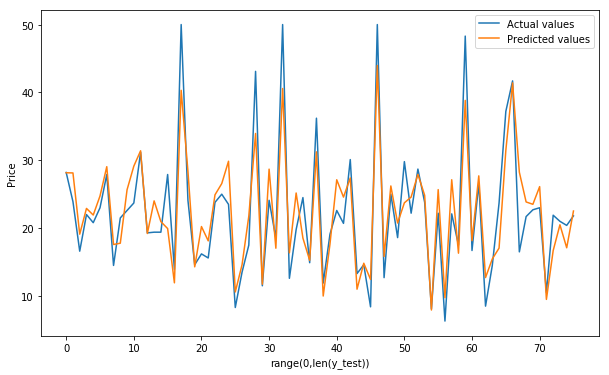

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(0,len(y_test)), y_test,label='Actual values')
plt.plot(range(0,len(y_test)), yhat,label='Predicted values')
plt.ylabel('Price')
plt.xlabel('range(0,len(y_test))')
plt.legend()

In [13]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [28.15849495 28.13118111 19.10829145 22.9030613 ]
test set : [28.2 23.9 16.6 22. ]


In [14]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

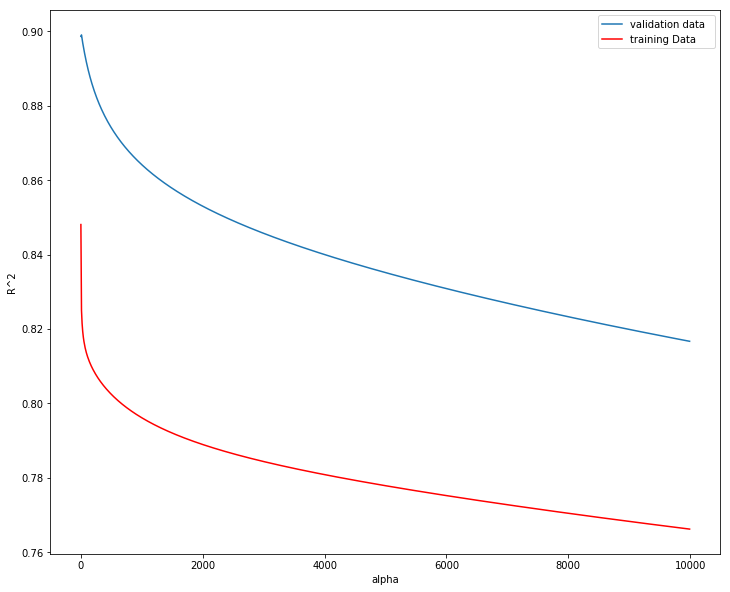

In [15]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()